## Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
%matplotlib inline
from matplotlib import pyplot as plt

## The Data

In [15]:
#read the dataset
df = pd.read_csv('K-menas 2.csv')
df.head()

,id,Wellbeing score,BuildingHeights,Integration,Flow,PTAL,Casualty,Fuel,Supermarket,Choice
0,1,0.134691,0.388653,0.000000,180,0.37562,0.443,1.56945,0,0
1,2,0.134691,0.388653,0.000000,180,0.37562,0.443,1.56945,0,0
2,3,0.134691,0.388653,0.000000,180,0.37562,0.443,1.56945,0,0
3,4,0.134691,0.388653,0.001579,184,0.37542,0.440,1.57993,0,0
4,5,0.134691,0.010464,0.000000,692,0.34858,0.111,2.75711,0,0


In [16]:
df.shape

(37650, 10)

In [17]:
for column in df.columns:
    if df[column].dtype != 'object':  # Ignore non-numeric columns
        min_value = df[column].min()
        df[column].fillna(min_value, inplace=True)

In [18]:
df.head()# Get the first 5 rows

,id,Wellbeing score,BuildingHeights,Integration,Flow,PTAL,Casualty,Fuel,Supermarket,Choice
0,1,0.134691,0.388653,0.000000,180,0.37562,0.443,1.56945,0,0
1,2,0.134691,0.388653,0.000000,180,0.37562,0.443,1.56945,0,0
2,3,0.134691,0.388653,0.000000,180,0.37562,0.443,1.56945,0,0
3,4,0.134691,0.388653,0.001579,184,0.37542,0.440,1.57993,0,0
4,5,0.134691,0.010464,0.000000,692,0.34858,0.111,2.75711,0,0


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37650 entries, 0 to 37649
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               37650 non-null  int64  
 1   Wellbeing score  37650 non-null  float64
 2   BuildingHeights  37650 non-null  float64
 3   Integration      37650 non-null  float64
 4   Flow             37650 non-null  int64  
 5   PTAL             37650 non-null  float64
 6   Casualty         37650 non-null  float64
 7   Fuel             37650 non-null  float64
 8   Supermarket      37650 non-null  int64  
 9   Choice           37650 non-null  int64  
dtypes: float64(6), int64(4)
memory usage: 2.9 MB


In [22]:
df.columns

Index(['id', 'Wellbeing score', 'BuildingHeights', 'Integration', 'Flow',
       'PTAL', 'Casualty', 'Fuel', 'Supermarket', 'Choice'],
      dtype='object')

## Clean DATA

In [23]:
data=df[[ 'Wellbeing score', 'BuildingHeights', 'Integration', 'Flow',
       'PTAL', 'Casualty', 'Fuel', 'Supermarket', 'Choice']]

In [24]:
data.shape

(37650, 9)

In [32]:
data.head()

,Wellbeing score,BuildingHeights,Integration,Flow,PTAL,Casualty,Fuel,Supermarket,Choice
0,0.134691,0.388653,0.000000,180,0.37562,0.443,1.56945,0,0
1,0.134691,0.388653,0.000000,180,0.37562,0.443,1.56945,0,0
2,0.134691,0.388653,0.000000,180,0.37562,0.443,1.56945,0,0
3,0.134691,0.388653,0.001579,184,0.37542,0.440,1.57993,0,0
4,0.134691,0.010464,0.000000,692,0.34858,0.111,2.75711,0,0


In [33]:
data.isnull().values.any()#check if there is any null value

False

In [34]:
datalocation=df[['id']]

In [35]:
datalocation.head()

,id
0,1
1,2
2,3
3,4
4,5


In [36]:
import os

# 2. Normalize the data
normalized_df = data.copy()
for column in data.columns:
    if normalized_df[column].dtype != 'object':  
        max_value = normalized_df[column].max()
        normalized_df[column] = normalized_df[column] / max_value

codebook_path = os.path.abspath('codebook.csv')
save_dir = os.path.dirname(codebook_path)

# Create the full path for the new CSV file
normalized_csv_file = os.path.join(save_dir, 'normalized_data.csv')

# 3. The normalized data is saved back to a CSV file
normalized_df.to_csv(normalized_csv_file, index=False)


In [37]:
#Re-read the file, noting that the data read below belongs to the normalized_data file
df = pd.read_csv('normalized_data.csv')
df.head()

,Wellbeing score,BuildingHeights,Integration,Flow,PTAL,Casualty,Fuel,Supermarket,Choice
0,0.134691,0.388653,0.000000,0.016541,0.022895,0.065243,0.056563,0.0,0.0
1,0.134691,0.388653,0.000000,0.016541,0.022895,0.065243,0.056563,0.0,0.0
2,0.134691,0.388653,0.000000,0.016541,0.022895,0.065243,0.056563,0.0,0.0
3,0.134691,0.388653,0.001579,0.016909,0.022883,0.064801,0.056941,0.0,0.0
4,0.134691,0.010464,0.000000,0.063591,0.021247,0.016348,0.099367,0.0,0.0


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37650 entries, 0 to 37649
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Wellbeing score  37650 non-null  float64
 1   BuildingHeights  37650 non-null  float64
 2   Integration      37650 non-null  float64
 3   Flow             37650 non-null  float64
 4   PTAL             37650 non-null  float64
 5   Casualty         37650 non-null  float64
 6   Fuel             37650 non-null  float64
 7   Supermarket      37650 non-null  float64
 8   Choice           37650 non-null  float64
dtypes: float64(9)
memory usage: 2.6 MB


In [39]:
df.columns

Index(['Wellbeing score', 'BuildingHeights', 'Integration', 'Flow', 'PTAL',
       'Casualty', 'Fuel', 'Supermarket', 'Choice'],
      dtype='object')

In [42]:
#Group(If it is necessary to group the data.All the datas are counted as one group here)
data1=df[['Wellbeing score', 'BuildingHeights', 'Integration', 'Flow', 'PTAL',
       'Casualty', 'Fuel', 'Supermarket', 'Choice']]

## Visualisation

In [43]:
data1.corr()

,Wellbeing score,BuildingHeights,Integration,Flow,PTAL,Casualty,Fuel,Supermarket,Choice
Wellbeing score,1.000000,0.237022,0.395444,0.330256,0.596362,0.401585,0.670477,0.055756,0.212633
BuildingHeights,0.237022,1.000000,0.382123,0.148397,0.378296,0.347461,0.192475,0.128714,0.252382
Integration,0.395444,0.382123,1.000000,0.210076,0.504597,0.429634,0.327591,0.121630,0.697252
Flow,0.330256,0.148397,0.210076,1.000000,0.354280,0.274211,0.457573,0.033376,0.133647
PTAL,0.596362,0.378296,0.504597,0.354280,1.000000,0.557455,0.607430,0.093586,0.281108
Casualty,0.401585,0.347461,0.429634,0.274211,0.557455,1.000000,0.367725,0.120402,0.307107
Fuel,0.670477,0.192475,0.327591,0.457573,0.607430,0.367725,1.000000,0.035653,0.150028
Supermarket,0.055756,0.128714,0.121630,0.033376,0.093586,0.120402,0.035653,1.000000,0.173478
Choice,0.212633,0.252382,0.697252,0.133647,0.281108,0.307107,0.150028,0.173478,1.000000


Text(0.5, 1.0, 'Heatmap of data correlation')

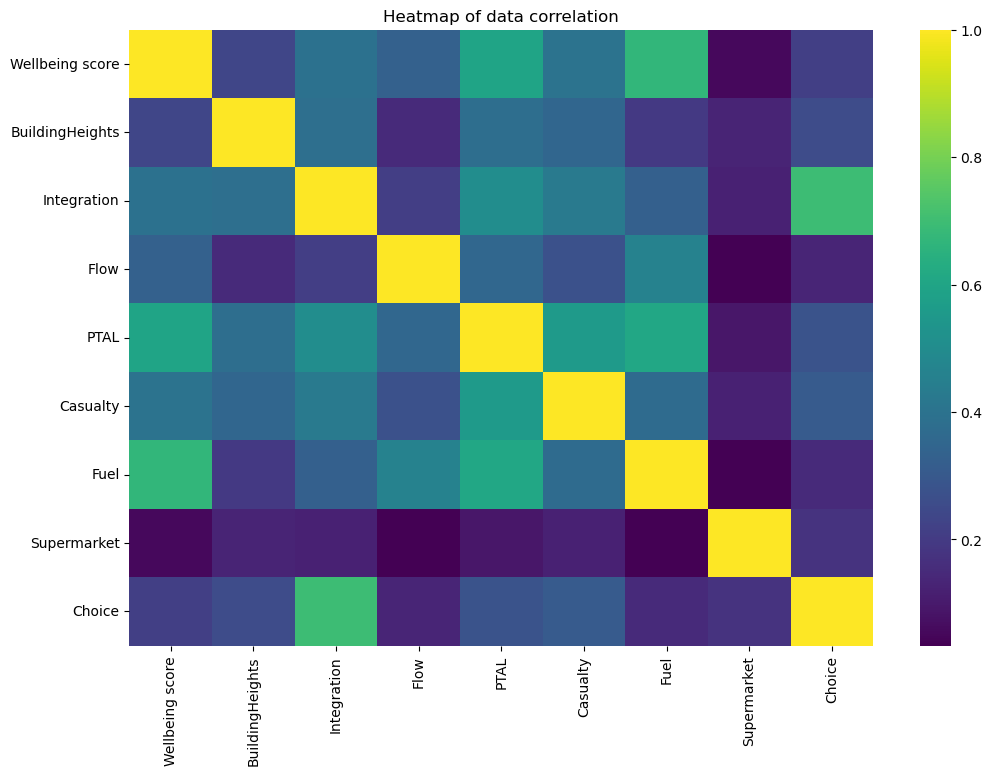

In [48]:
import seaborn as sns
plt.figure(figsize=(12,8))
heatmap = sns.heatmap(data1.corr(), cmap='viridis')#这个data要改

plt.title('Heatmap of data correlation')

## DIVIDE DATA FOR ANALYSIS

In [49]:
#the data should be doublicated in order to run the analysis independantly
data2=data1.copy()
data3=data1.copy()

# Alternative you can divide the code into 2 files. DO NOT USE PCA data in KMEANS or the opposite

## K-Means Clustering

### A. Define the number of clusters (Elbow method)

In [50]:
#Fit data and calculate sum of squares(wss)
wss=[]
from sklearn.cluster import KMeans

for i in range (1,21):    
    kmeans=KMeans(n_clusters=i,init="k-means++")
    kmeans.fit(data1)
    wss.append(kmeans.inertia_)

C:\Users\15809\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\15809\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\15809\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\15809\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of

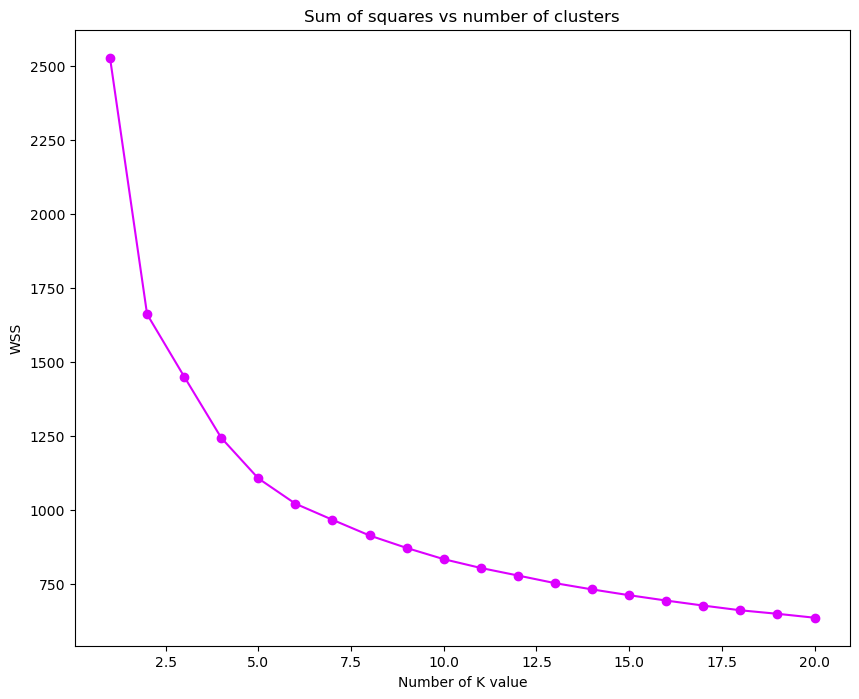

In [51]:
#Visualisation of the k values in order to define the fittest
plt.figure(figsize=(10,8))
plt.plot(range(1,21),wss,marker="o", color="#dc00ff")
plt.xlabel("Number of K value")
plt.ylabel("WSS")
plt.title("Sum of squares vs number of clusters")
#plt.savefig("Elbow.png", dpi=300,transparent=True)
plt.show()

### B.Clustering the data

In [52]:
#import library
from sklearn.cluster import KMeans

In [53]:
#pick number of clusters
kmeans = KMeans(n_clusters=5)

In [54]:
#fit the data
kmeans.fit(data1)

C:\Users\15809\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=5)

In [55]:
#find the cluster centers
kmeans.cluster_centers_

array([[ 3.05131783e-01,  1.10061833e-01,  1.63415794e-01,
         7.17093710e-02,  1.09349293e-01,  1.15381131e-01,
         1.35074094e-01,  5.26537998e-01,  1.08645587e-01],
       [ 1.37122975e-01,  4.05692746e-02,  3.93629602e-02,
         3.16670821e-02,  1.69321063e-02,  3.15634498e-02,
         5.43914895e-02,  1.21430643e-17,  1.18896265e-02],
       [ 2.90170333e-01,  6.28987713e-02,  8.06518697e-02,
         6.98205479e-02,  6.79772572e-02,  7.12425540e-02,
         1.46662015e-01,  1.90819582e-16,  2.22555995e-02],
       [ 3.06059024e-01,  1.12449532e-01,  2.92969747e-01,
         7.25932514e-02,  1.39061121e-01,  1.36552900e-01,
         1.35953199e-01, -5.20417043e-17,  1.71579622e-01],
       [ 5.32706152e-01,  8.57909885e-02,  1.41630332e-01,
         1.09714049e-01,  1.63655908e-01,  1.12002754e-01,
         2.37224780e-01,  6.50477016e-04,  3.95904733e-02]])

In [56]:
#identify cluster labels
kmeans.labels_

array([1, 1, 1, ..., 1, 1, 1])

In [57]:
#identify length of cluster labels
len(kmeans.labels_)

37650

In [58]:
#Add cluster column in dataset
data1['CLUSTERS'] = kmeans.fit_predict(data1)

C:\Users\15809\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [59]:
data1.head()

,Wellbeing score,BuildingHeights,Integration,Flow,PTAL,Casualty,Fuel,Supermarket,Choice,CLUSTERS
0,0.134691,0.388653,0.000000,0.016541,0.022895,0.065243,0.056563,0.0,0.0,0
1,0.134691,0.388653,0.000000,0.016541,0.022895,0.065243,0.056563,0.0,0.0,0
2,0.134691,0.388653,0.000000,0.016541,0.022895,0.065243,0.056563,0.0,0.0,0
3,0.134691,0.388653,0.001579,0.016909,0.022883,0.064801,0.056941,0.0,0.0,0
4,0.134691,0.010464,0.000000,0.063591,0.021247,0.016348,0.099367,0.0,0.0,0


### C.Visualise your Kmeans result

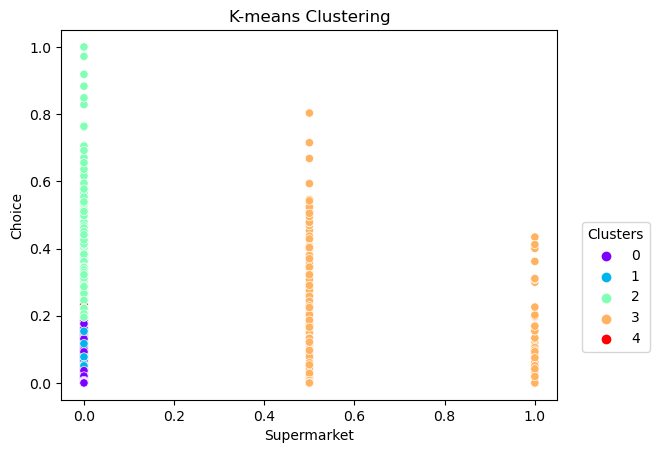

In [63]:
#Scatterplot of clustered data
sns.scatterplot(x=data1['Supermarket'], y=data1['Choice'], hue= kmeans.labels_, palette='rainbow')
plt.title('K-means Clustering')
plt.legend(loc=0,bbox_to_anchor=(1.2,0.5),title="Clusters")
plt.show()

## Principal Component Analysis

### A. Preprocessing

In [64]:
from sklearn.preprocessing import StandardScaler

In [65]:
scaler = StandardScaler()
scaler.fit(data2)

StandardScaler()

In [66]:
scaled_data = scaler.transform(data2)

### B. Running PCA

In [67]:
from sklearn.decomposition import PCA

In [68]:
pca = PCA(n_components=3)

In [69]:
pca.fit(scaled_data)

PCA(n_components=3)

In [70]:
x_pca = pca.transform(scaled_data)

In [71]:
scaled_data.shape #15 dimensions

(37650, 9)

In [72]:
x_pca.shape #3 dimensions

(37650, 3)

### C.Interpretation of results

In [73]:
pca.components_

array([[ 0.38738868,  0.27338719,  0.38537732,  0.26965152,  0.4314873 ,
         0.36467565,  0.37792483,  0.09787898,  0.28702742],
       [-0.29479123,  0.24914529,  0.38255314, -0.33487974, -0.13651694,
         0.04811126, -0.41388843,  0.33623015,  0.5359361 ],
       [ 0.01980245,  0.02960036, -0.27300512,  0.12468335,  0.008652  ,
         0.02332279,  0.06906811,  0.91648999, -0.25161643]])

In [74]:
df_comp = pd.DataFrame(pca.components_,columns=data2.columns)

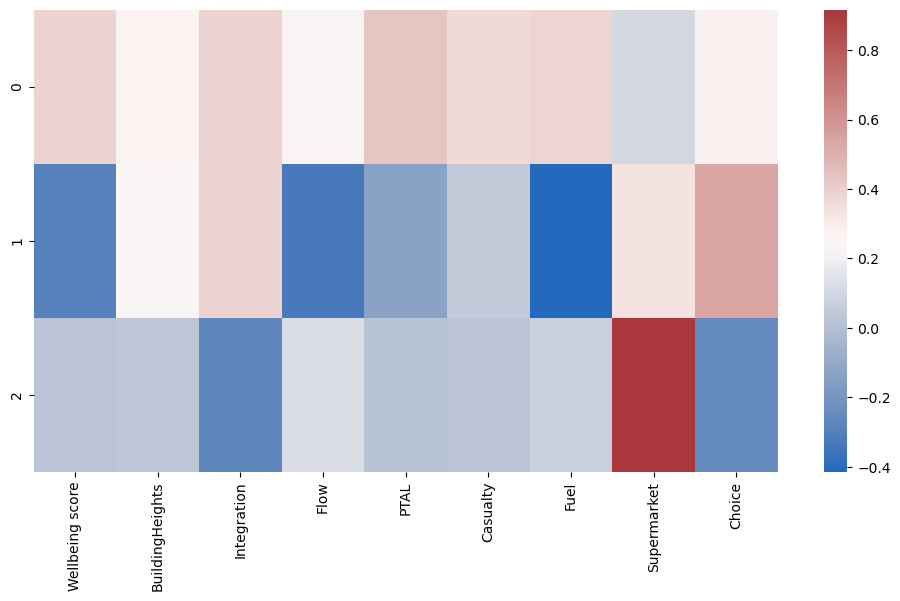

In [75]:
plt.figure(figsize=(12,6))

sns.heatmap(df_comp,cmap='vlag')
plt.show()

In [76]:
cmap = sns.diverging_palette(180, 295, s=100, l=50,
                                  n=10, center= "dark", as_cmap = True)

#Documentation: https://seaborn.pydata.org/generated/seaborn.diverging_palette.html

<Axes: >

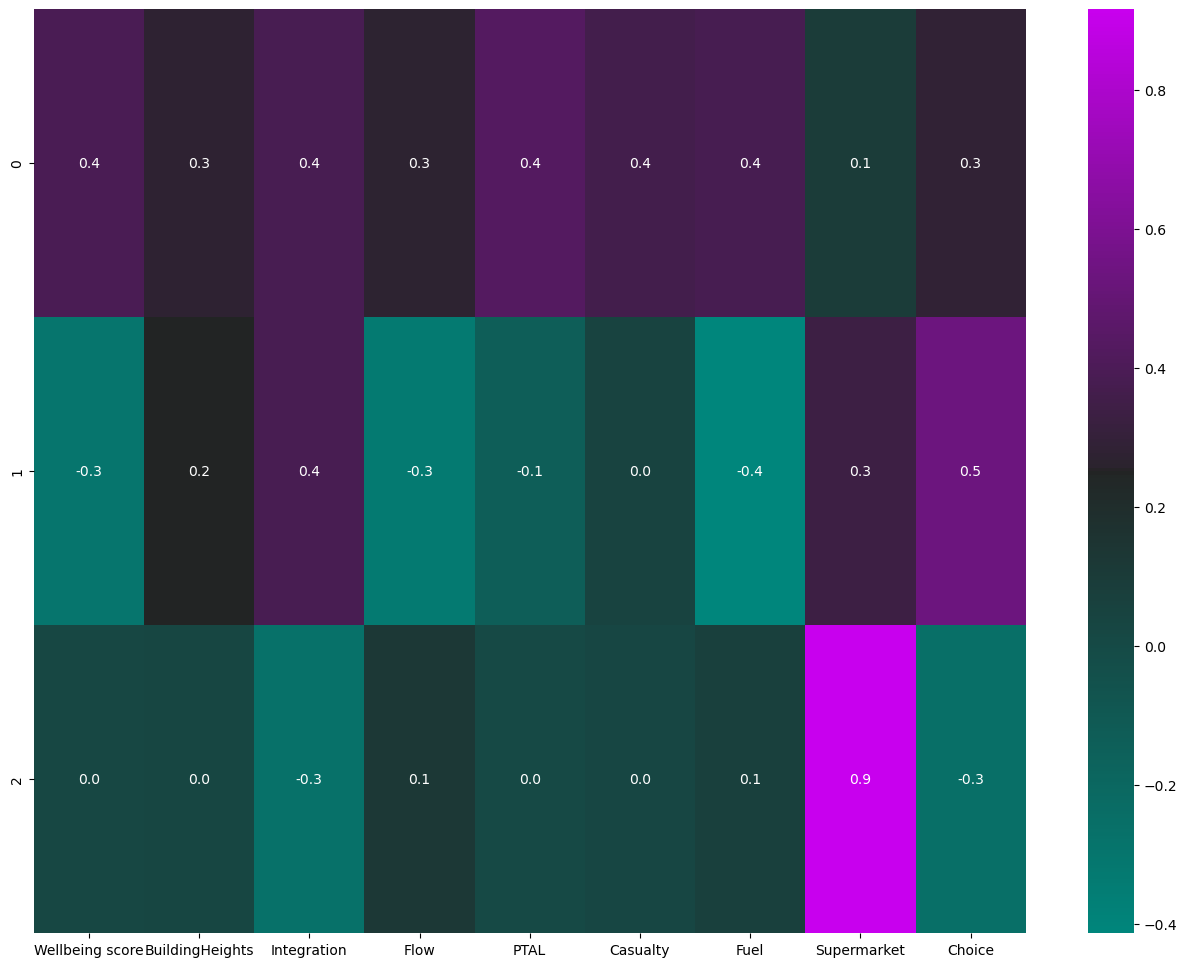

In [77]:
plt.figure(figsize=(16,12))
sns.heatmap(df_comp,cmap= cmap, annot=True,fmt = ".1f")

In [78]:
df_comp.head()

,Wellbeing score,BuildingHeights,Integration,Flow,PTAL,Casualty,Fuel,Supermarket,Choice
0,0.387389,0.273387,0.385377,0.269652,0.431487,0.364676,0.377925,0.097879,0.287027
1,-0.294791,0.249145,0.382553,-0.334880,-0.136517,0.048111,-0.413888,0.336230,0.535936
2,0.019802,0.029600,-0.273005,0.124683,0.008652,0.023323,0.069068,0.916490,-0.251616


In [79]:
df=pd.DataFrame(x_pca, columns = ['0','1','2'])

In [80]:
df.head()

,0,1,2
0,0.107729,1.572435,0.273597
1,0.107729,1.572435,0.273597
2,0.107729,1.572435,0.273597
3,0.114871,1.574886,0.269831
4,-1.624440,-0.576483,0.181067


In [81]:
datalocation.head()

,id
0,1
1,2
2,3
3,4
4,5


In [82]:
df_prefinal=pd.concat([df,datalocation],axis=1)

In [83]:
df_prefinal.head()

,0,1,2,id
0,0.107729,1.572435,0.273597,1
1,0.107729,1.572435,0.273597,2
2,0.107729,1.572435,0.273597,3
3,0.114871,1.574886,0.269831,4
4,-1.624440,-0.576483,0.181067,5


In [84]:
df_final=pd.concat([df_prefinal, data1],axis=1)

In [85]:
df_final.head()

,0,1,2,id,Wellbeing score,BuildingHeights,Integration,Flow,PTAL,Casualty,Fuel,Supermarket,Choice,CLUSTERS
0,0.107729,1.572435,0.273597,1,0.134691,0.388653,0.000000,0.016541,0.022895,0.065243,0.056563,0.0,0.0,0
1,0.107729,1.572435,0.273597,2,0.134691,0.388653,0.000000,0.016541,0.022895,0.065243,0.056563,0.0,0.0,0
2,0.107729,1.572435,0.273597,3,0.134691,0.388653,0.000000,0.016541,0.022895,0.065243,0.056563,0.0,0.0,0
3,0.114871,1.574886,0.269831,4,0.134691,0.388653,0.001579,0.016909,0.022883,0.064801,0.056941,0.0,0.0,0
4,-1.624440,-0.576483,0.181067,5,0.134691,0.010464,0.000000,0.063591,0.021247,0.016348,0.099367,0.0,0.0,0


In [86]:
df_final.to_csv('FinalResult9.csv', encoding='utf-8', index=False)